<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Fowles_AM_CP6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def scatterN(r,n):
    '''
    목성의 질량이 궤도상에 일정한 간격으로 n 개로 나뉘어 분포했다고 가정했을 때
    태양으로부터 거리 r인 곳에서 목성 질량의 분포에 의한 평균 중력 퍼텐셜을
    구한다.
    '''
    dtheta = 2*np.pi / n;
    GM = mJ / n * G;
    potential = 0;
    for i in range(n):
        theta = dtheta * i ;
        xJ = rJ * np.cos(theta);
        yJ = rJ * np.sin(theta);
        distance = np.sqrt((xJ - r)**2 + yJ**2);
        if (distance==0) :
            warning("infinite self potential suspected and skipped");
        else:
            potential += -GM / distance
    return potential

In [ ]:
rE = 1.496e11
mJ = 1.898e27
rJ = 7.784e11
G = 6.67259e-11
Phi0 = -G * mJ / rJ

In [ ]:
def simulring(r):
    '''
    n을 2부터 시작하여 2배씩 증가시키며
    목성의 질량을 n개로 나누어 궤도상에 분포시켰을 때
    태양으로부터 거리 r인 동일 궤도면상의 평균 퍼텐셜을 차례로 구하되
    n을 한 단계 증가시킬 때 상대적인 값의 변화가 0.0001배 미만이면 멈추고
    그 때의 퍼텐셜 값과 n의 값을 반환한다.
    '''
    n = 2;
    oldpot = scatterN(r, 2);
    for i in range(10):
        n *= 2
        newpot = scatterN(r, n)
        diff  = newpot - oldpot
        if np.abs(diff / oldpot) < 1e-4:
            return (newpot, n)
        else:
            oldpot = newpot
    return np.array([oldpot, n])

In [ ]:
simulring(rE)

(-164234.53890171065, 16)

In [ ]:
pl = np.empty((0,))
nl = np.empty((0,))
pl

array([], dtype=float64)

In [ ]:
# 지구 반경을 rE라 할 때 rE의 0, 0.2, 0.4, 0.6, 0.8, 및 1 배의 위치에서
# 목성에 의한 평균 퍼텐셜의 배열 pl을 구한다.
pl = np.empty((0,))
nl = np.empty((0,))
r = np.linspace(0, rE, 6)
for j in range(6):
    r = rE / 5 * j
    p, n = simulring(r)
    pl = np.append(pl, p)
    nl = np.append(nl, n)

In [ ]:
pl # 각각의 궤도 반경에 대한 퍼텐셜의 리스트

array([-162700.10046249, -162760.24642891, -162941.28682531,
       -163245.0494327 , -163674.63548432, -164234.53890171])

In [ ]:
nl  # 각각의 궤도 반경에 대한 n값의 리스트

array([ 4.,  8.,  8.,  8., 16., 16.])

In [ ]:
rl = np.linspace(0, rE, 6) # 0, 0.2, 0.4, ... 1배의 지구 궤도 반경의 리스트
rl

array([0.0000e+00, 2.9920e+10, 5.9840e+10, 8.9760e+10, 1.1968e+11,
       1.4960e+11])

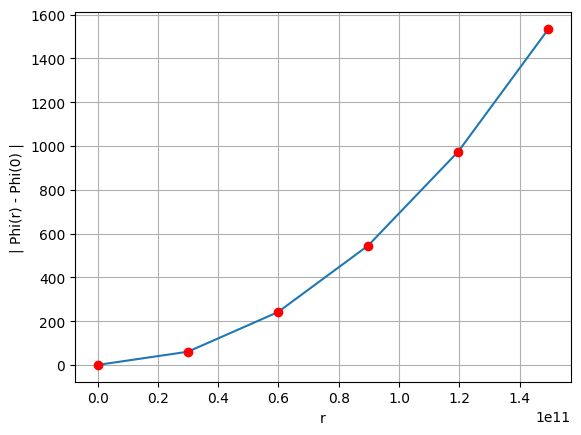

In [ ]:
### 궤도 반경에 대한 평균 퍼텐셜의 절댓값의 관계를 그래프로 나타낸다.
#   단 상수항을 뺀 값을 사용한다.
plt.plot(rl, np.abs(pl-Phi0));
plt.plot(rl, np.abs(pl-Phi0), 'ro');
plt.grid();
plt.xlabel("r")
plt.ylabel("| Phi(r) - Phi(0) |");

In [ ]:
# 위의 관계를 2차 함수로 피팅한 다항식의 계수
# 단, 궤도 반경은 rJ로 나눈 값을 사용하고 퍼텐셜은 상수항을 빼고 거리 0에서의 값 Phi0 으로 나눈 정규화 값을 사용한다.
# p[0], p[1], p[2]는 각각 2차항, 1차항, 상수항의 계수이다.
p = np.polyfit(rl/rJ, np.abs((pl-Phi0)/Phi0), 2)

In [ ]:
x = np.linspace(0, rE/rJ, 51)

In [ ]:
def polyf(x, p):
  '''
  피팅 계수 p 로부터 재구성한 다항식 피팅 함수
  '''
  y = 0
  for c in p:
    y = y * x + c
  return y

def mypoly1d(p):
  return lambda x: polyf(x, p)

mpf = mypoly1d(p)
y = mpf(x)

In [ ]:
pf = np.poly1d(p)
y2 = pf(x)

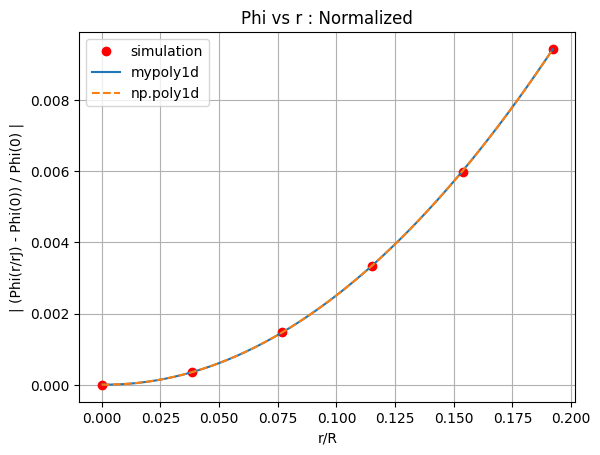

In [ ]:
# Normalize한 피팅 함수와 시뮬레이션 결과 비교
plt.title("Phi vs r : Normalized")
plt.plot(rl/rJ, np.abs((pl-Phi0)/Phi0), 'ro', label="simulation");
plt.plot(x, y, label = "mypoly1d");
plt.plot(x, y2, ls="dashed", label = "np.poly1d");
plt.legend();
plt.grid();
plt.xlabel("r/R");
plt.ylabel("| (Phi(r/rJ) - Phi(0)) / Phi(0) |");